# Part 1
   #### Removing Non Numeric Data
        Before finding correlation matrix and creating a heat map, we need to remove non-numeric data.

In [249]:
import pandas as pd

properties_file = 'properties_2016.csv'
data_reader = pd.read_csv(properties_file, dtype='str')

del data_reader['propertycountylandusecode']
del data_reader['propertyzoningdesc']

x = data_reader.loc[:,'taxdelinquencyflag']
x.loc[x == 'Y'] = 1
x.loc[x != 1] = 0

x = data_reader.loc[:,'hashottuborspa']
x.loc[x == 'true'] = 1
x.loc[x != 1] = 0

x = data_reader.loc[:,'fireplaceflag']
x.loc[x == 'true'] = 1
x.loc[x != 1] = 0

data_reader.to_csv('numeric.csv', mode='w', index = False)

print('Remaining Data Shape : ', data_reader.shape)


Remaining Data Shape :  (2985217, 56)


#### Finding Correlation Matrix
        After removing non-numeric data, I picked some interesting pairs of properties and created a correlation matrix.
#### Visualization of Correlations using Heat Map
    Use seaborn library to visualize the heatmap of correlations

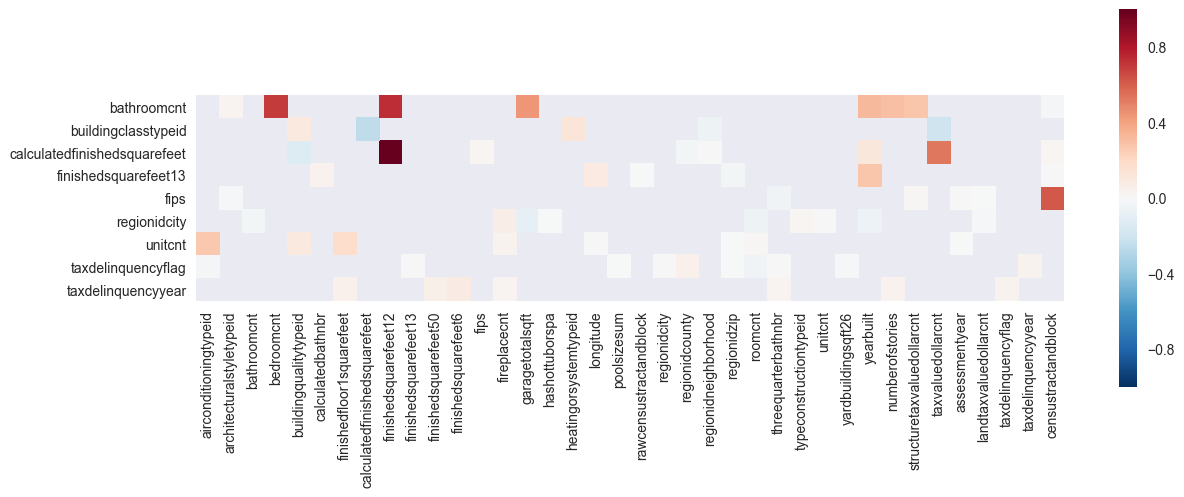

In [250]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

data_reader = pd.read_csv('numeric.csv')
pearson_corr = data_reader.corr()

corrs = [(11, 12), (11, 45), (11, 17), (11, 49), (11, 55), (11, 35), (11, 30), (11, 27), (11, 36), (11, 7), (42, 37), (42, 13), (42, 25), (42, 1), (42, 7), (42, 38), (42, 9), (42, 18), (42, 50), (42, 10), (34, 22), (34, 18), (34, 41), (34, 21), (34, 45), (34, 51), (34, 38), (34, 9), (34, 4), (34, 42), (54, 39), (54, 16), (54, 50), (54, 40), (54, 15), (54, 46), (54, 41), (54, 10), (54, 53), (54, 18), (31, 29), (31, 54), (31, 33), (31, 14), (31, 24), (31, 13), (31, 42), (31, 11), (31, 30), (31, 51), (17, 51), (17, 39), (17, 27), (17, 43), (17, 50), (17, 40), (17, 55), (17, 3), (17, 48), (17, 2), (4, 27), (4, 45), (4, 46), (4, 5), (4, 48), (4, 30), (4, 21), (4, 55), (4, 12), (4, 2), (6, 30), (6, 36), (6, 23), (6, 7), (6, 11), (6, 49), (6, 31), (6, 12), (6, 18), (6, 3), (13, 12), (13, 8), (13, 37), (13, 55), (13, 33), (13, 3), (13, 28), (13, 29), (13, 45), (13, 25), (53, 1), (53, 38), (53, 34), (53, 13), (53, 35), (53, 28), (53, 44), (53, 37), (53, 54), (53, 40)]

for i in range(56):
	for j in range(56):
		if tuple([i, j]) not in corrs:
			pearson_corr.loc[data_reader.columns[i], data_reader.columns[j]] = np.NaN

dim = pearson_corr.shape
to_drop_col = []
for column in pearson_corr.columns:
    nans = pearson_corr.loc[:, column].isnull().sum()
    if nans == dim[0]:
        to_drop_col.append(column)

to_drop_row = []
for index, row in pearson_corr.iterrows():
    nans = pearson_corr.loc[index, :].isnull().sum()
    if nans == dim[1]:
        to_drop_row.append(index)

pearson_corr = pearson_corr.drop(to_drop_col, axis=1)
pearson_corr = pearson_corr.drop(to_drop_row, axis=0)

plt.figure(figsize=(14, 5), dpi= 100)
sns.heatmap(pearson_corr)
plt.gca().set_aspect('equal')
plt.show() 

- Highly Correlated: **calculatedfinishedsquarefeet** and **finishedsquarefeet12** has a perfect correlation with a pearson score of 1.
- Highly Anti-Correlated: **calculatedfinishedsquarefeet** and **buildingclasstypeid** has correlation score of ~0.25 which tells that if expensive material is used in a house , finished area in that house is usually less which makes sense.
- There are a bunch of pairs which are not really correlated. We can see those in the heatmap above
#### Note: highest correlated and antirelated entities are picked from the subset of pairs of the items that I found interesting and are not the highest correlated and least correlated entities from all the pairs of dataset.

### Part 2
#### Correlation of Properties with log-error
It is interesting to note that some properties like **basementsqft** show decent correlation with log-error and some are anti-correlated like **heatingsystempeid**, while there are some properties like **latitude** and **roomcnt** that are neither correlated nor strongly anti-correlated. It shows that these features will not contribute much while trying to fit them on a linear model. and this those show close relation should be used to while fitting using linear models.  

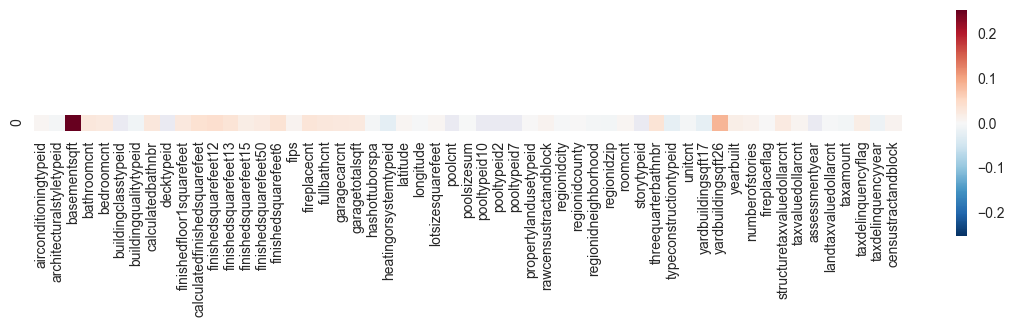

In [251]:
data_reader = pd.read_csv('numeric.csv')
log_err = pd.read_csv('train_2016_v2.csv')
result = pd.merge(data_reader, log_err, on=['parcelid', 'parcelid'])
result = result.drop('transactiondate', axis=1)
result = result.drop('parcelid', axis=1)
pearson_corr = result.corr()

cols = pearson_corr.columns
pearson_corr = pearson_corr.loc['logerror', :]
pearson_corr1 = pearson_corr.values.reshape(1,56)
pc1 = pd.DataFrame(pearson_corr1, columns=cols)
pc1 = pc1.drop('logerror', axis=1)

plt.figure(figsize=(14, 3), dpi= 100)
sns.heatmap(pc1)
plt.gca().set_aspect('equal')
plt.show() 





#### Variation in log-error w.r.t Time
Looking at the following graphs, we see that log-error in the price prediction is not monotonic with the time. But, one interesting thing to note is that it shows a cyclic behavior.   

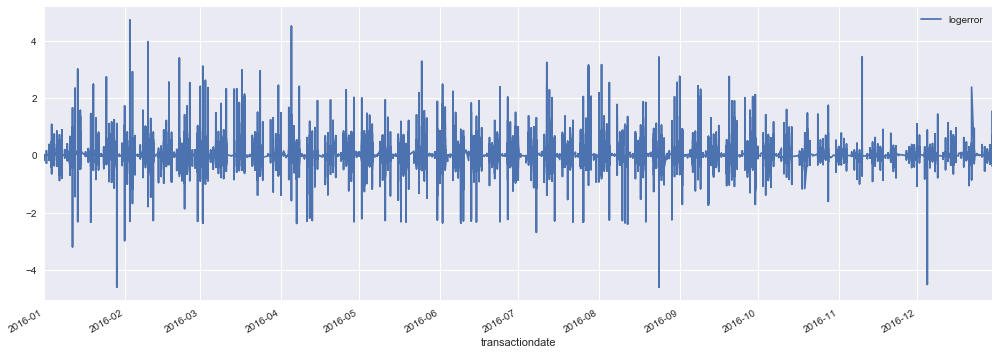

In [252]:
log_err = pd.read_csv('train_2016_v2.csv')
log_err['transactiondate'] =pd.to_datetime(log_err.transactiondate)
log_err = log_err.sort_values(by='transactiondate')
log_err.plot(x='transactiondate', y='logerror',figsize=(17, 6))
plt.show()


#### Freqeuncy Distribution of logerror
After looking at the following plots, we infer that in most of the predictions, error was very low and there are very few outliers which can easily be filtered while doing regression. That's the beauty of log scale! 

-4.605
4.737


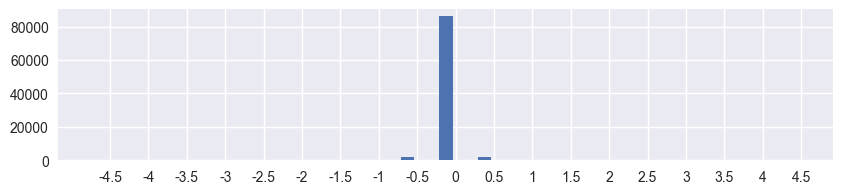

In [253]:
log_err = pd.read_csv('train_2016_v2.csv')
print(log_err['logerror'].min())
print(log_err['logerror'].max())

arr = log_err['logerror'].values

buckets = [-4.5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5]
index = np.arange(19)
counts = [0 for i in range(len(buckets))]
mn = 100
mx = -100
for x in arr:
    ind = int(( x + 4.605)*2.05)
    
    if ind > 18:
        ind = 18
    counts[ind] += 1

plt.figure(figsize=(10, 2), dpi= 100)
plt.bar(index, counts, 0.35)
plt.xticks(index + 0.5 / 2, buckets)
plt.show()




#### Zoomed Version :

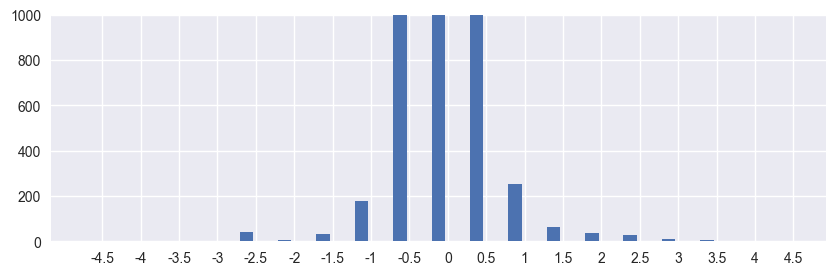

In [254]:
plt.figure(figsize=(10, 3), dpi= 100)
plt.bar(index, counts, 0.35)
plt.xticks(index + 0.5 / 2, buckets)
plt.ylim([0,1000])
plt.show()

#### Room Count vs Bath Count
One expects Full Bath Count to increase with the number of rooms, but surprisingly, in the following graph, it shows that its difficult to predict the number of full baths a house can have given the number of rooms it has. This preposition has on assumption that this data has no outliers. Since, we are not considering frequency of a certain count of bathrooms with respect to rooms here. We might be able to give a stronger proposition if we look into the freqeuncies as well.

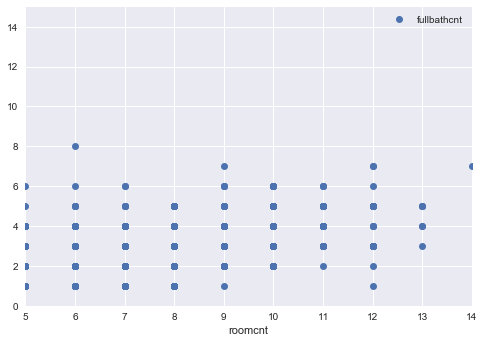

In [255]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 100000000
data = pd.read_csv('numeric.csv')
data = data[data['roomcnt'].notnull()]
data = data[data['fullbathcnt'].notnull()]
data = data[data['roomcnt']!=0]
# x = data['roomcnt'].unique())
# print(data.shape)
data = data.loc[:50000, :]
# print(data['roomcnt'].unique())
# print(data['fullbathcnt'].unique())
data.plot(x='roomcnt', y='fullbathcnt', style='o', xlim=[5,14], ylim=[0, 15])
plt.show()

### Spread of Features w.r.t. Log Error
In this, we plot 7 variables with log_error to see how the spread of different variables look like. It looks like spread of most of the variables is similar in such a way that no matter you apply linear regression with any of these (one variable at a time) you will be getting almost the same fit. Part 3 confirms this hypothesis

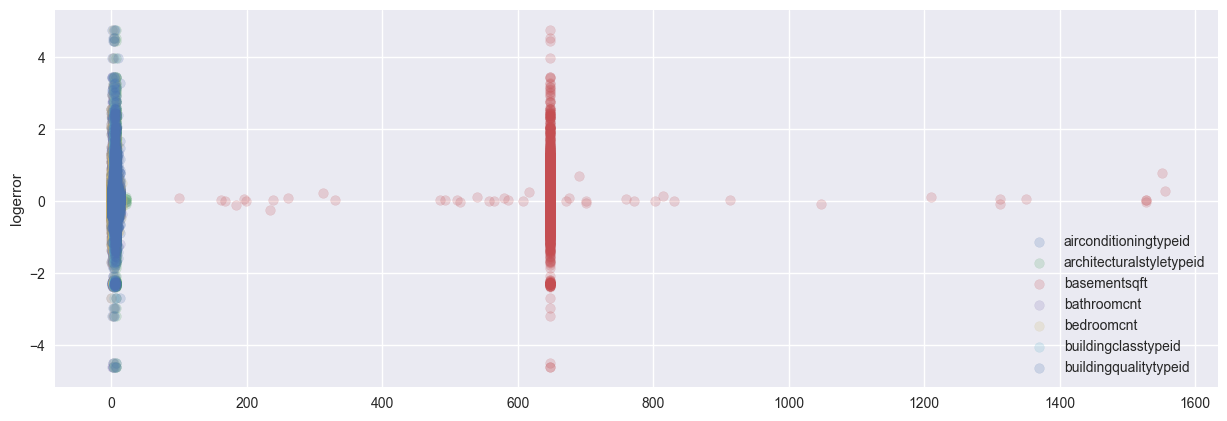

In [256]:
properties = pd.read_csv('numeric.csv')
properties = properties.fillna(properties.mean())
log_err = pd.read_csv('train_2016_v2.csv')
result = pd.merge(properties, log_err, on=['parcelid', 'parcelid'])
count = 0

y = result['logerror'].values
y = y.reshape(90275, 1)

plt.figure(figsize=(15, 5), dpi= 100)

for col in result.columns:
        if col == 'parcelid' or col == 'logerror' or col == 'transactiondate':
            continue
        if count >= 7:
            break
        x = result[col].values
        x = x.reshape(90275, 1)
        plt.scatter(x, y, label=col, alpha=0.2)
        plt.legend(loc='lower right')
        count += 1
plt.ylabel('logerror')
plt.show()

it is a bit difficult to see all the variables in the above one plot. For ease, here are all the plots spearately: 

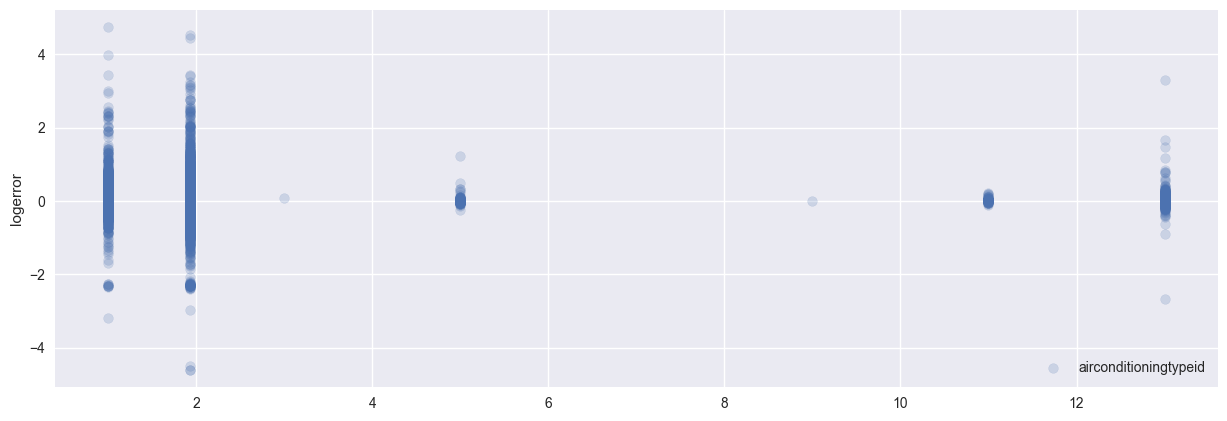

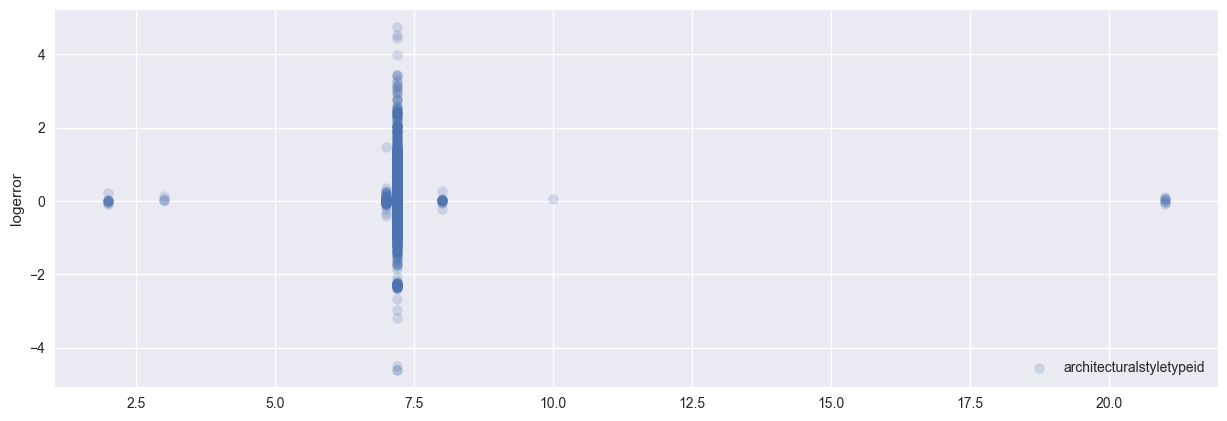

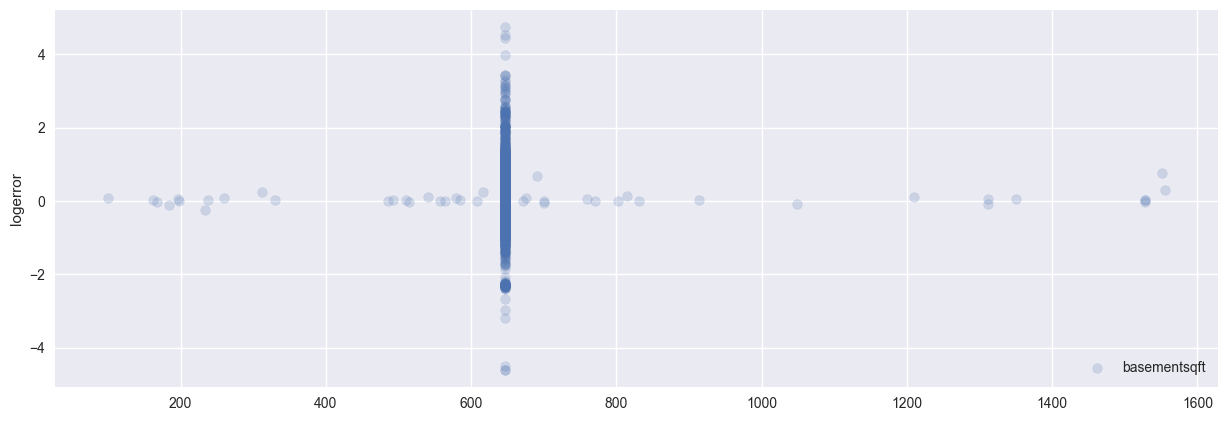

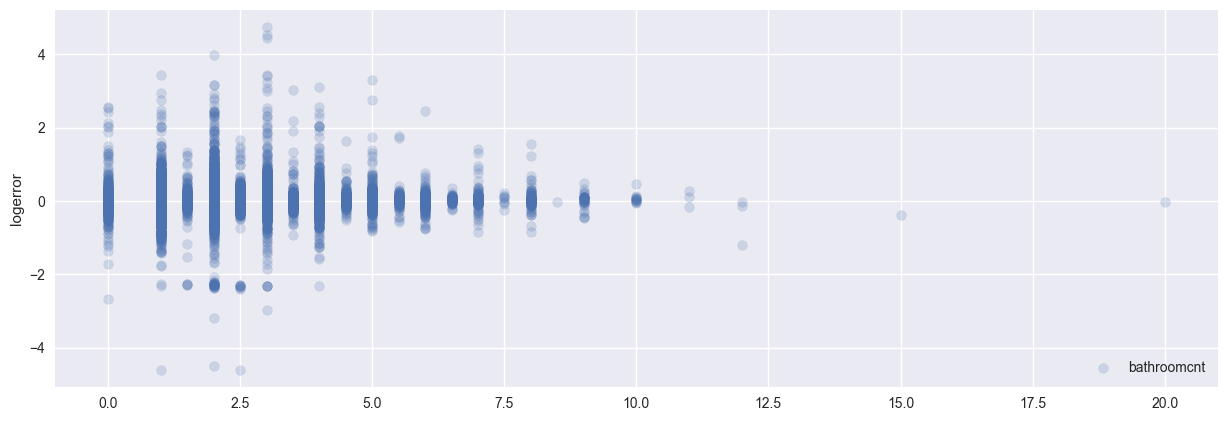

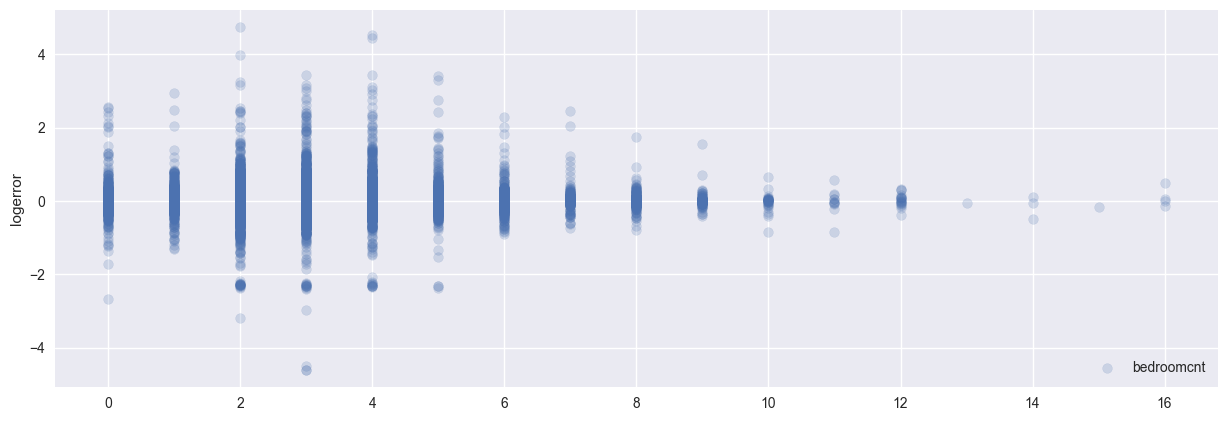

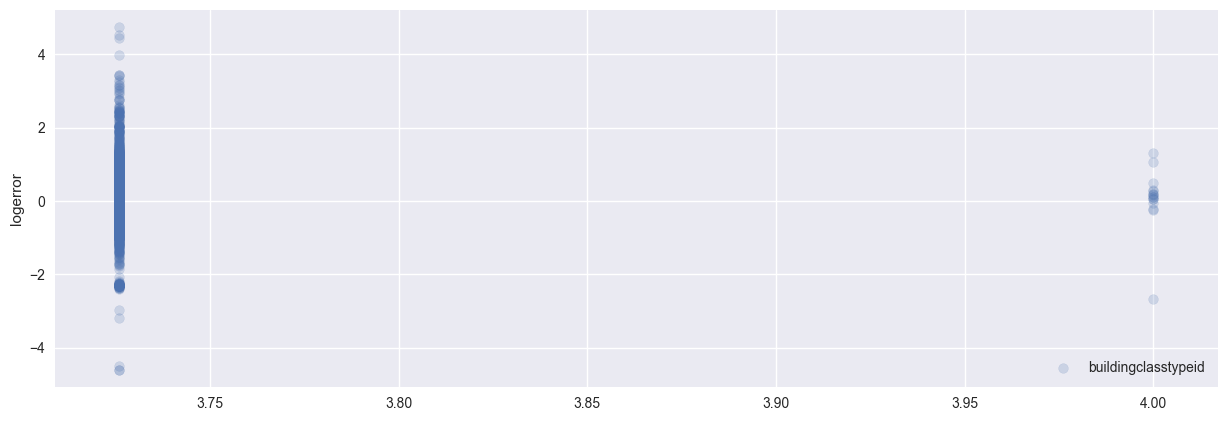

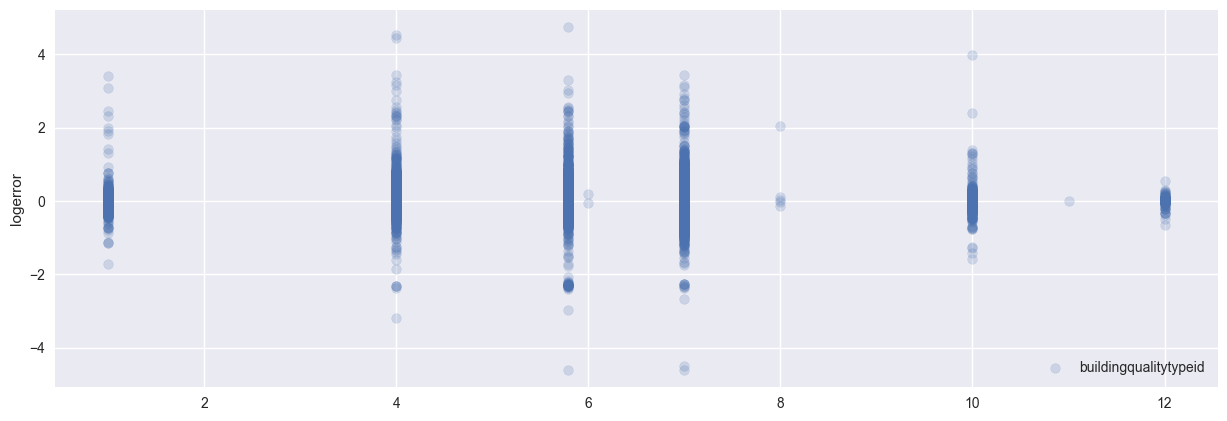

In [257]:
properties = pd.read_csv('numeric.csv')
properties = properties.fillna(properties.mean())
log_err = pd.read_csv('train_2016_v2.csv')
result = pd.merge(properties, log_err, on=['parcelid', 'parcelid'])
count = 0

y = result['logerror'].values
y = y.reshape(90275, 1)



for col in result.columns:
        if col == 'parcelid' or col == 'logerror' or col == 'transactiondate':
            continue
        if count >= 7:
            break
        x = result[col].values
        x = x.reshape(90275, 1)
        plt.figure(figsize=(15, 5), dpi= 100)
        plt.scatter(x, y, label=col, alpha=0.2)
        plt.legend(loc='lower right')
        plt.ylabel('logerror')
        count += 1

plt.show()

### Part 3
    To apply linear regression, first step is to get rid of NaN values. To start simple, just replace all the NaN values with there averages. 

In [258]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from copy import deepcopy

properties = pd.read_csv('numeric.csv')
properties = properties.fillna(properties.mean())
log_err = pd.read_csv('train_2016_v2.csv')
result = pd.merge(properties, log_err, on=['parcelid', 'parcelid'])
result = result.drop('transactiondate', axis=1)
result = result.drop('parcelid', axis=1)
result.to_csv('simplemodel_data.csv', index=False, mode='w')
print(result.shape)

(90275, 56)


    Using the Above data, apply a simple linear regression on single variables and pick the 10 variables for which the linear regression gives the lowest mean squared error. Use those variables togethher to further reduce the error.

In [259]:
data = pd.read_csv('simplemodel_data.csv')
y = result['logerror'].values
y = y.reshape(90275, 1)
y_train = y[:-20000]
y_test = y[-20000:]

data = data.loc[:, data.columns != 'logerror']

err_list = []
properties = dict()

for column in  data.columns:
    x = result[column].values
    x = x.reshape(90275, 1)
    x_train = x[:-20000]
    x_test = x[-20000:]
    
    regr = linear_model.LinearRegression()
    regr.fit(x_train, y_train)
    y_pred = regr.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    err_list.append(mse)
    properties[mse] = column

err_list.sort()

err_list = err_list[:10]


imp_properties = []
for err in err_list:
    imp_properties.append(properties[err])

print("Most Important Properties : ", imp_properties)

# data = data.loc[:, imp_properties]
x = data.values
x_train = x[:-20000]
x_test = x[-20000:]
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Square Error of Simple Model with all shortlisted features : ', mse)

data = data.loc[:, imp_properties]
x = data.values
x_train = x[:-20000]
x_test = x[-20000:]
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Square Error of Simple Model with top 10 features : ', mse)


Most Important Properties :  ['finishedsquarefeet12', 'calculatedfinishedsquarefeet', 'bathroomcnt', 'calculatedbathnbr', 'fullbathcnt', 'taxdelinquencyflag', 'bedroomcnt', 'yearbuilt', 'structuretaxvaluedollarcnt', 'heatingorsystemtypeid']
Mean Square Error of Simple Model with all shortlisted features :  0.02503610659
Mean Square Error of Simple Model with top 10 features :  0.0249462576559


#### Mean Squared Error of Simple Model : 0.0249462576559

Following Entries Look like Most Important Properites based on Mean Squared Error for Linear Regression:
- **finishedsquarefeet12**
- **calculatedfinishedsquarefeet**
- **bathroomcnt**
- **calculatedbathnbr**
- **fullbathcnt**
- **taxdelinquencyflag**
- **bedroomcnt**
- **yearbuilt**
- **structuretaxvaluedollarcnt**
- **heatingorsystemtypeid**

### Part 4
   #### Random Forests
        First try a Random Forests on the same data-set without cleaning the data

In [260]:
from sklearn.ensemble import RandomForestRegressor

data = pd.read_csv('simplemodel_data.csv')
y = result['logerror'].values
y = y.reshape(90275, 1)
y_train = y[:-20000]
y_test = y[-20000:]
data = data.loc[:, data.columns != 'logerror']

err_list = []
properties = dict()

for column in  data.columns:
    x = result[column].values
    x = x.reshape(90275, 1)
    x_train = x[:-20000]
    x_test = x[-20000:]
    
    regr = RandomForestRegressor(max_depth=2, random_state=0)
    regr.fit(x_train, y_train.ravel())
    y_pred = regr.predict(x_test)
    
    mse = mean_squared_error(y_test, y_pred)
    err_list.append(mse)
    properties[mse] = column

err_list.sort()

err_list = err_list[:10]


imp_properties = []
for err in err_list:
    imp_properties.append(properties[err])


data = data.loc[:, imp_properties]
x = data.values
x_train = x[:-20000]
x_test = x[-20000:]
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(x_train, y_train.ravel())
y_pred = regr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error of RandomForest Regression: ', mse)

Mean Squared Error of RandomForest Regression:  0.0248379786825


   #### Nearest Nieghbors
        Lets try Nearest Nieghbors regression on the same data-set without any significant preprocessing

In [261]:
from sklearn.neighbors import KNeighborsRegressor

data = pd.read_csv('simplemodel_data.csv')
print(data.shape)
y = result['logerror'].values
y = y.reshape(90275, 1)
y_train = y[:-20000]
y_test = y[-20000:]
data = data.loc[:, data.columns != 'logerror']

err_list = []
properties = dict()

for column in  data.columns:
    x = result[column].values
    x = x.reshape(90275, 1)
    x_train = x[:-20000]
    x_test = x[-20000:]
    
    regr = KNeighborsRegressor(n_neighbors=10)
    regr.fit(x_train, y_train)
    y_pred = regr.predict(x_test)
    
    mse = mean_squared_error(y_test, y_pred)
    err_list.append(mse)
    properties[mse] = column

err_list.sort()

err_list = err_list[:10]


imp_properties = []
for err in err_list:
    imp_properties.append(properties[err])


data = data.loc[:, imp_properties]
x = data.values
x_train = x[:-20000]
x_test = x[-20000:]
regr = KNeighborsRegressor(n_neighbors=10)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error of Nearest Neighbor Regression: ', mse)

(90275, 56)
Mean Squared Error of Nearest Neighbor Regression:  0.0349486639042


### Data Cleaning
####   Removing Bad Properties and Filling NaNs
  - Remove the Columns for which there are more than ~80% NaN Values because even if we fill those properties with anything, its going to effect regression negatively because of a lot of missing data. Also since, we have a decent number of properties to play with. We can afford get rid of some columns which are not giving significant information.
  - After that, remove some columns into which filling anything like average or a zero value does not make sense e.g. bath-room count or pool count of a home.
  - Next step is getting rid of all the remianing NaNs. Now, for better cleaning, its a good idea to have a look at each property and try to understand what this field represents and fill the missing values with something which makes more sense as compared to filling with just the mean of the column or zeros. Following is the list of properties for which I did this some-what more guided cleaning:
   - **airconditioningtypeid** : From the Data dictionary, 6 indicates some unknown type, fill missing values with '6'
   - **poolcnt** : Assume that if pool count of a home is NaN, it means that it don't have a pool. Fill missing values with zeros. (Same for **pooltypeid10**, **pooltypeid2**, **pooltypeid7**, **fireplacecnt**)
   - **heatingorsystemtypeid** : From the Data dictionary, 14 indicates some unknown type, fill missing values with '14'
   - **buildingqualitytypeid** : Since there were not many houses with missing building quality. So, I just assigned mean value for the missing ones. (Same for **garagetotalsqft**)
  - After this, I just removed all the rows in which there were still some missing values. After doing all of this, i ended up with almost ~7000 entries and ~35 properties

#### Normalization of Data
  Normalize all the properties such that all of them have a mean of zero and standard deviation of 1. This is really helpful in doing regression if we want to treat all proprties equally. This helps to make the values in all the columns comaprable

In [262]:
properties = pd.read_csv('numeric.csv')
log_err = pd.read_csv('train_2016_v2.csv')
result = pd.merge(properties, log_err, on=['parcelid', 'parcelid'])

to_remove = ['assessmentyear', 'numberofstories','unitcnt' ,'regionidneighborhood','garagecarcnt','architecturalstyletypeid', 
            'basementsqft', 'buildingclasstypeid', 'decktypeid','finishedfloor1squarefeet', 'finishedsquarefeet13',
            'finishedsquarefeet15', 'finishedsquarefeet50', 'finishedsquarefeet6', 'poolsizesum', 'storytypeid',
            'threequarterbathnbr', 'typeconstructiontypeid', 'yardbuildingsqft17', 'yardbuildingsqft26',
            'taxdelinquencyyear', 'transactiondate']

result = result.drop(to_remove, axis=1)

tmp = result.loc[:,'airconditioningtypeid']
tmp.fillna(6, inplace=True)

tmp = result.loc[:,'poolcnt']
tmp.fillna(0, inplace=True)

tmp = result.loc[:,'pooltypeid10']
tmp.fillna(0, inplace=True)

tmp = result.loc[:,'pooltypeid2']
tmp.fillna(0, inplace=True)

tmp = result.loc[:,'pooltypeid7']
tmp.fillna(0, inplace=True)

tmp = result.loc[:,'fireplacecnt']
tmp.fillna(0, inplace=True)

tmp = result.loc[:,'heatingorsystemtypeid']
tmp.fillna(14, inplace=True)

tmp = result.loc[:,'buildingqualitytypeid']
tmp.fillna(int(tmp.mean()), inplace=True)

tmp = result.loc[:,'garagetotalsqft']
tmp.fillna(int(tmp.mean()), inplace=True)

result = result.dropna()

print(result.isnull().sum().sum())
print(result.shape)

result.to_csv('clean_data.csv', mode='w', index = False)

0
(73972, 36)


#### Test All Three Regression Techniques Again
Now, lets test all the three techniques again and see what improvements we get and find the best model

In [263]:
from sklearn.neighbors import KNeighborsRegressor

for regression in ['linear', 'rf', 'kNN']:
    

    data = pd.read_csv('clean_data.csv')
    data = data.drop('parcelid', axis=1)
    y = result['logerror'].values
    y = y.reshape(73972, 1)
    y_train = y[:-10000]
    y_test = y[-10000:]
    data = data.loc[:, data.columns != 'logerror']
    
    data = (data - data.mean())/(data.std(ddof=0))

    err_list = []
    properties = dict()

    for column in  data.columns:
        x = result[column].values
        x = x.reshape(73972, 1)
        x_train = x[:-10000]
        x_test = x[-10000:]
        
        regr = None
        if regression == 'linear':
            regr = linear_model.LinearRegression()
        elif regression == 'rf':
            regr = RandomForestRegressor(max_depth=2, random_state=0)
        elif regression == 'kNN':
            regr = KNeighborsRegressor(n_neighbors=12)
        regr.fit(x_train, y_train.ravel())
        
        y_pred = regr.predict(x_test)

        mse = mean_squared_error(y_test, y_pred)
        err_list.append(mse)
        properties[mse] = column

    err_list.sort()

    err_list = err_list[:10]


    imp_properties = []
    for err in err_list:
        imp_properties.append(properties[err])


    data = data.loc[:, imp_properties]
    x = data.values
    x_train = x[:-10000]
    x_test = x[-10000:]
    regr = None
    if regression == 'linear':
        regr = linear_model.LinearRegression()
    elif regression == 'rf':
        regr = RandomForestRegressor(max_depth=2, random_state=0)
    elif regression == 'kNN':
        regr = KNeighborsRegressor(n_neighbors=12)
    regr.fit(x_train, y_train.ravel())
    y_pred = regr.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    print('Mean Squared Error of %s Regression: ' % regression, mse) 

Mean Squared Error of linear Regression:  0.0224937743615
Mean Squared Error of rf Regression:  0.0225222972396
Mean Squared Error of kNN Regression:  0.0244050974308


### Best Model
I tested following Models and measured Mean Squared Error (MSE) in all of them:

- Linear Regression with Simple Cleaning of Data using top 10 features (LR1)
- Random Forest with Simple Cleaning of Data using top 10 features (RF1)
- Nearest Neighbors with Simple Cleaning of Data using top 10 features (kNN1)
- Linear Regression with Detailed Cleaning of Data using top 10 features (LR2)
- Random Forest with Detailed Cleaning of Data using top 10 features (RF2)
- Nearest Neighbors with Detailed Cleaning of Data using top 10 features (kNN1)
- Nearest Neighbors with Simple Cleaning of Data using all features which made sense to me(~35) (LR3)

Following Table shows the comparison of MSE of all these models:

| Model     | MSE             |
|-----------|:---------------:|
| LR1       | 0.0249462576559 |
| RF1       | 0.0248379786825 |
| kNN1      | 0.0349486639042 |
| **LR2**       | **0.0224937743615** |
| RF2       | 0.0225222972396 |
| kNN2      | 0.0244050974308 |
| LR3       | 0.02503610659   |

**LR2** performs best among these following are the plausible reasons for improvement as compared to others:
- Getting rid of columns which don't have significant amount of values don't force the model to converge to highly unpredicted and some what less probable state.
- Dealing with NaNs in a more detailed fashion as compared to just filling with NaNs
- With Simple cleaning, performance of Random Forests is similar to Linear Regression, but it doesnot improve with cleaning to that extent. It looks like LR benefits more from cleaning as compared to RF.


### Part 5
- My Submission Score : 1.1884135
- My submission Username: uhafeez

In [ ]:
# print('Hello World!')
# properties_file = 'properties_2016.csv'
# data_reader = pd.read_csv(properties_file, dtype='str')
# print(data_reader.shape)

# properties_file = 'sample_submission.csv'
# data_reader = pd.read_csv(properties_file, dtype='str')
# print(data_reader.shape)



data = pd.read_csv('clean_data.csv')
data = data.drop('parcelid', axis=1)
y = result['logerror'].values
y = y.reshape(73972, 1)
y_train = y[:-10000]
y_test = y[-10000:]
data = data.loc[:, data.columns != 'logerror']

data = (data - data.mean())/(data.std(ddof=0))

err_list = []
properties = dict()

for column in  data.columns:
    x = result[column].values
    x = x.reshape(73972, 1)
    x_train = x[:-10000]
    x_test = x[-10000:]

    regr = None
    if regression == 'linear':
        regr = linear_model.LinearRegression()
    elif regression == 'rf':
        regr = RandomForestRegressor(max_depth=2, random_state=0)
    elif regression == 'kNN':
        regr = KNeighborsRegressor(n_neighbors=12)
    regr.fit(x_train, y_train.ravel())

    y_pred = regr.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    err_list.append(mse)
    properties[mse] = column

err_list.sort()

err_list = err_list[:10]


imp_properties = []
for err in err_list:
    imp_properties.append(properties[err])

print(imp_properties)

x_test1 = pd.read_csv('numeric.csv')
x_test = x_test1.fillna(x_test1.mean())
x_test = x_test.loc[:, imp_properties]
print(x_test.shape)

data = data.loc[:, imp_properties]
x = data.values
x_train = x
y_train = y
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train.ravel())
y_pred = regr.predict(x_test)
print(type(y_pred))
y_pred = y_pred.reshape(2985217, 1)
ids = x_test1['parcelid'].values.reshape(2985217, 1)
sub_file = 'sample_submission.csv'
df = pd.read_csv(sub_file)
print(df.shape)
print(df.columns)
ind = 0
ids = pd.DataFrame(ids)
y_pred = pd.DataFrame(y_pred)
sub = pd.concat([ids, y_pred, y_pred, y_pred, y_pred, y_pred, y_pred], axis=1)
sub.columns = ['ParcelId', '201610', '201611', '201612', '201710', '201711', '201712']
# print(type(sub))
# print(sub)
# print(sub.shape)
# sub = pd.DataFrame([ids, y_pred, y_pred, y_pred, y_pred, y_pred, y_pred], columns=['ParcelId', '201610', '201611', '201612', '201710', '201711', '201712'])


# for pid in ids:
#     df.loc[df.ParcelId == pid, '201610'] = y_pred[ind]
#     df.loc[df.ParcelId == pid, '201611'] = y_pred[ind]
#     df.loc[df.ParcelId == pid, '201612'] = y_pred[ind]
#     df.loc[df.ParcelId == pid, '201710'] = y_pred[ind]
#     df.loc[df.ParcelId == pid, '201711'] = y_pred[ind]
#     df.loc[df.ParcelId == pid, '201712'] = y_pred[ind]
#     ind += 1
#     if ind % 10000 == 0:
#         print(ind)

sub.to_csv('submission.csv', index=False, mode='w')
